### Veri setini Yükleme ve görselleştirme

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Seaborn stilini kullanmak için
sns.set(style="whitegrid")

In [ ]:
# Iris veri setini yükle
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# İlk birkaç satırı görüntüle
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
# Veri setinin özet istatistikleri
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


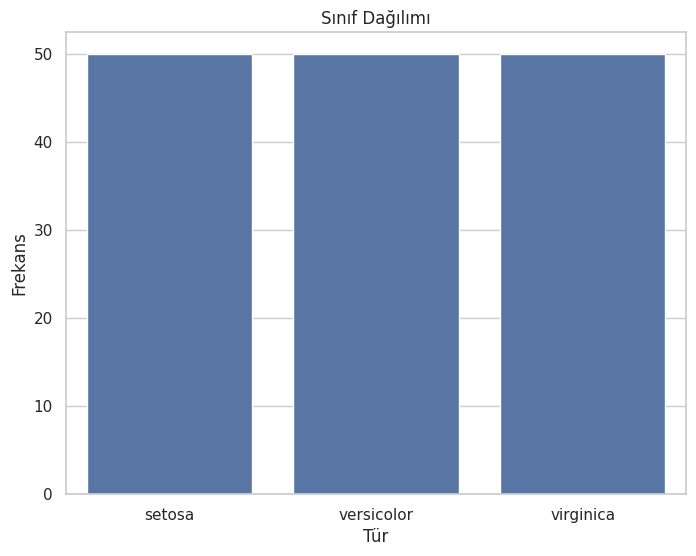

In [ ]:
# Sınıf dağılımını gösteren bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df)
plt.title('Sınıf Dağılımı')
plt.xlabel('Tür')
plt.ylabel('Frekans')
plt.show()

<Figure size 1200x1000 with 0 Axes>

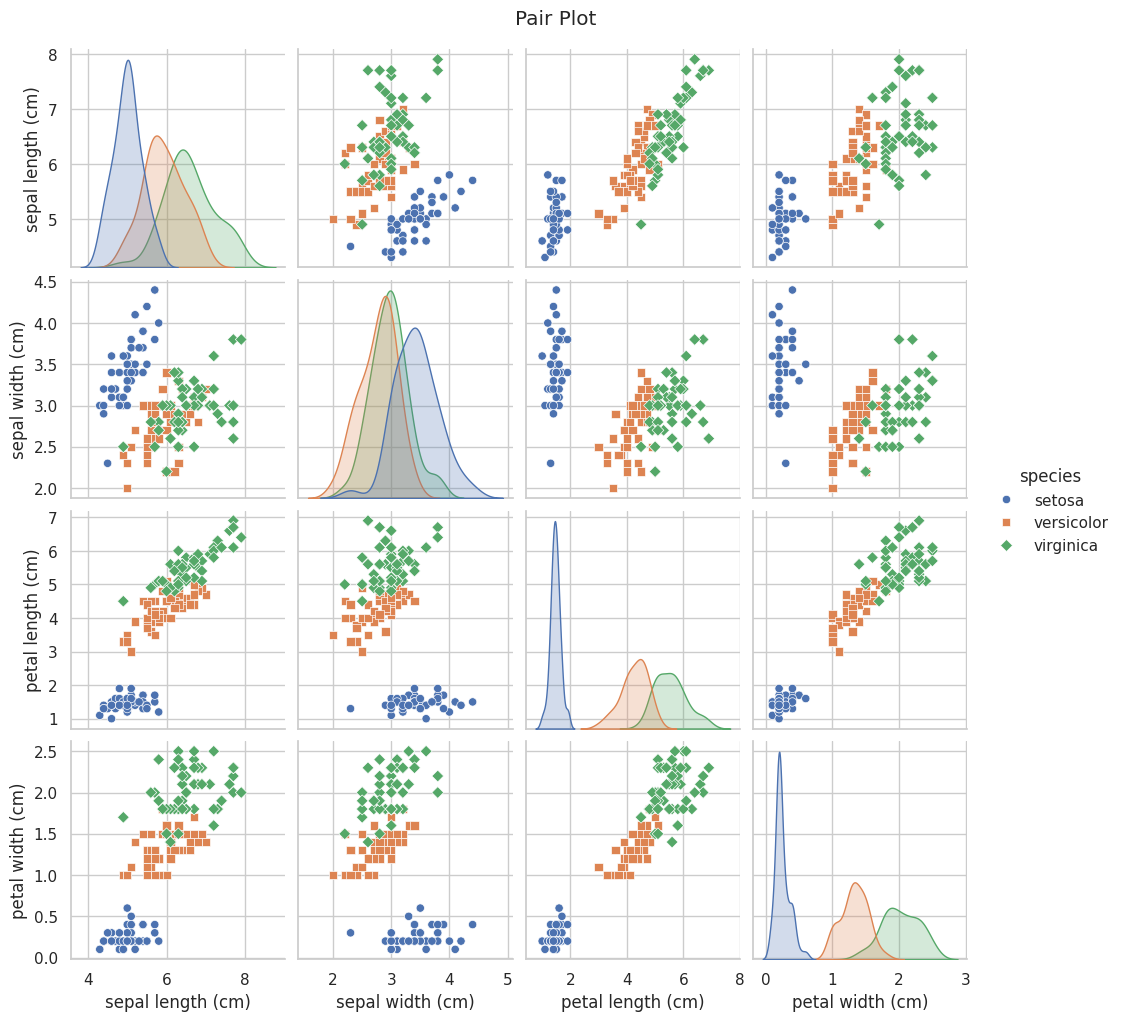

In [ ]:
# Pair plot ile özellikler arası ilişkileri ve sınıf dağılımını görselleştirme
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot', y=1.02)
plt.show()


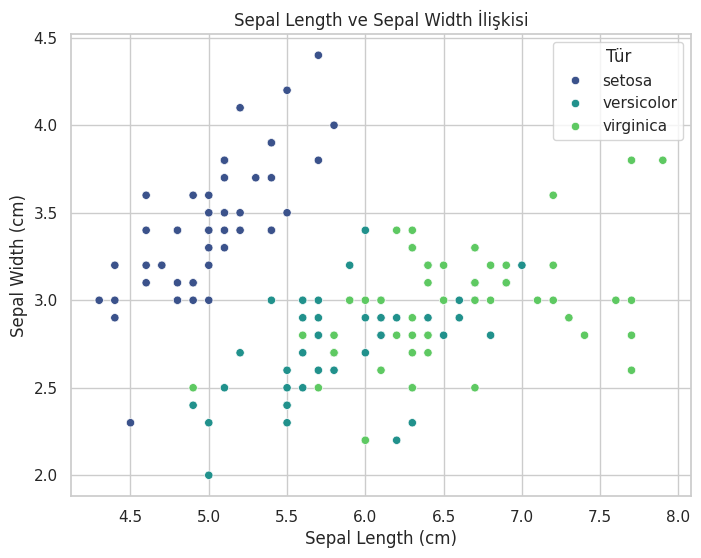

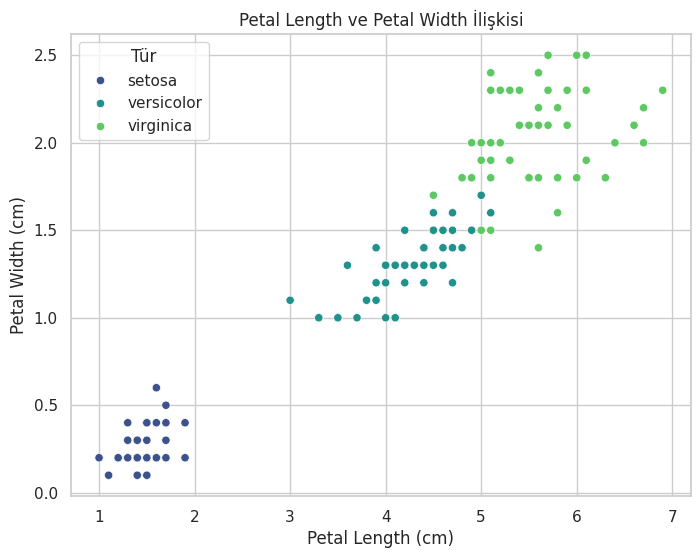

In [ ]:
# Scatter plot ile Sepal Length ve Sepal Width ilişkisi
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df, palette='viridis')
plt.title('Sepal Length ve Sepal Width İlişkisi')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Tür')
plt.show()

# Scatter plot ile Petal Length ve Petal Width ilişkisi
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df, palette='viridis')
plt.title('Petal Length ve Petal Width İlişkisi')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Tür')
plt.show()


#Destek Vektör Makineleri (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Iris veri setini yükle
iris = load_iris()
X = iris.data[:, :2]  # Sadece iki özelliği kullan (sepal length ve sepal width)
y = iris.target

# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# SVM modelini oluştur ve eğit
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

# Tahmin yap ve doğruluğu hesapla
y_pred = svm.predict(X_test)
accuracy = svm.score(X_test, y_test)
print(f"SVM Doğruluk: {accuracy:.2f}")

SVM Doğruluk: 0.73


### Karar sınırlarını görselleştirme

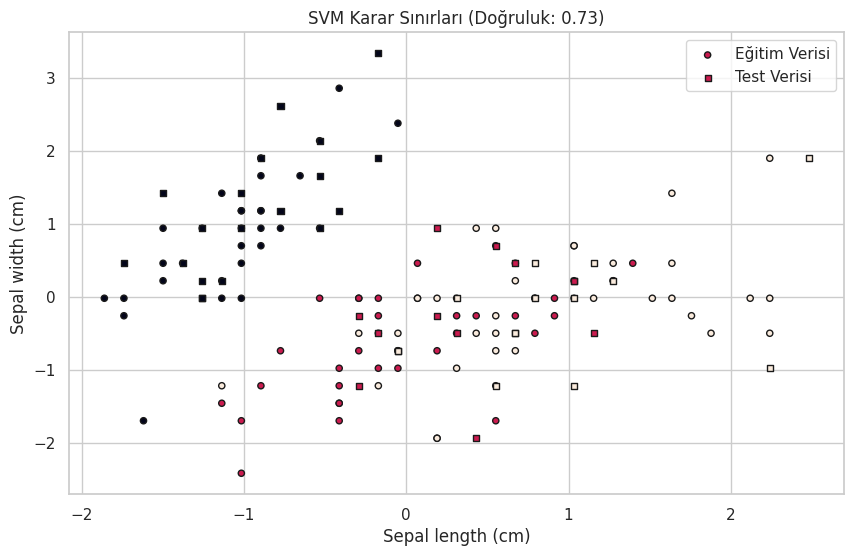

In [ ]:

h = .02  # mesh gridin adımı
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))


# Eğitim ve test noktalarını çiz
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, marker='o', label='Eğitim Verisi')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, marker='s', label='Test Verisi')

plt.title(f"SVM Karar Sınırları (Doğruluk: {accuracy:.2f})")
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()


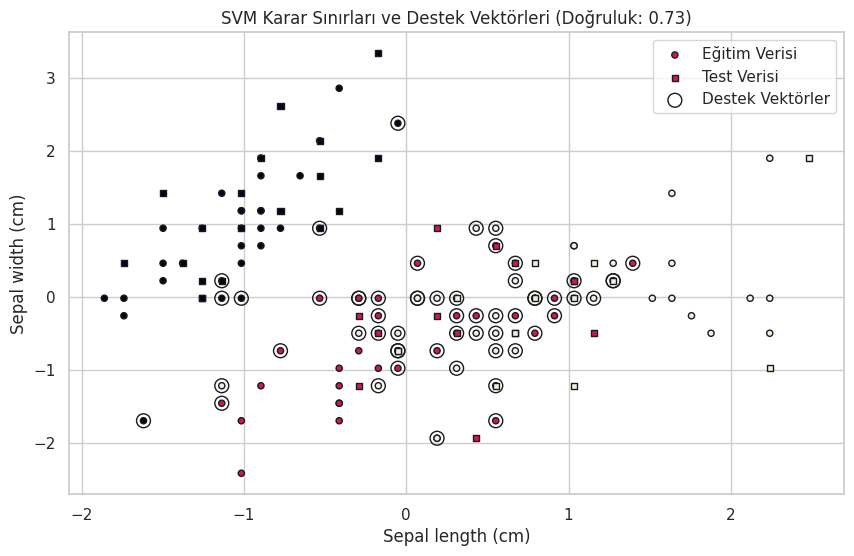

In [ ]:
#Desetek vekötrlerinin belirlenmesi
plt.figure(figsize=(10, 6))
# Eğitim ve test noktalarını çizme
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, marker='o', label='Eğitim Verisi')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, marker='s', label='Test Verisi')

# Destek vektörlerini çizme
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k', label='Destek Vektörler')

plt.title(f"SVM Karar Sınırları ve Destek Vektörleri (Doğruluk: {accuracy:.2f})")
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

### Farklı Kernel Yöntemleri ile SVM Modelleri Eğitme ve Görselleştirme

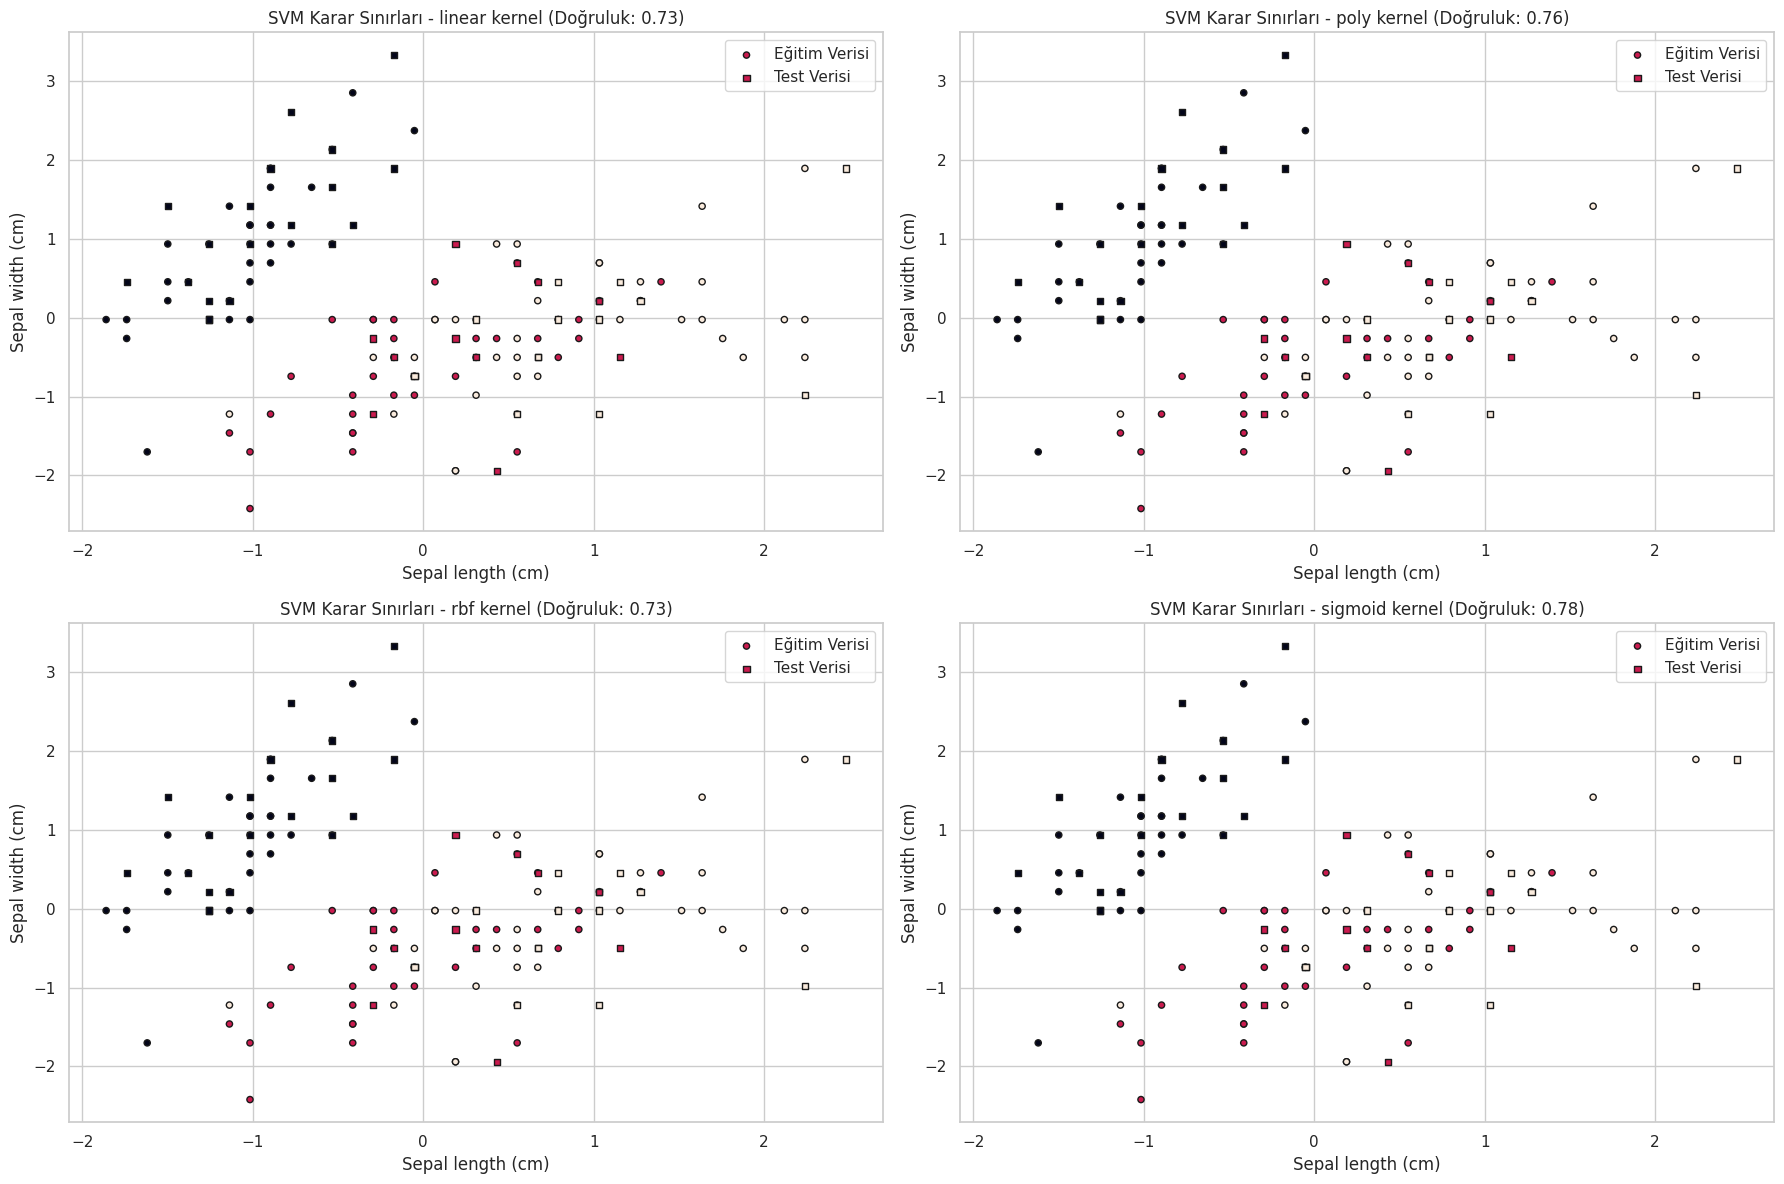

In [ ]:
#Farklı Kernel Yöntemleri ile SVM Modelleri Eğitme ve Görselleştirme
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Kernel yöntemleri ve renk paleti tanımları
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Karar sınırlarını görselleştirme
h = .02  # mesh gridin adımı
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure(figsize=(18, 12))

for i, kernel in enumerate(kernels):
    # SVM modelini oluştur ve eğit
    svm = SVC(kernel=kernel, C=1)
    svm.fit(X_train, y_train)

    # Tahmin yap ve doğruluğu hesapla
    accuracy = svm.score(X_test, y_test)

    # Karar sınırlarını hesapla
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Alt grafik oluşturma
    plt.subplot(2, 2, i + 1)


    # Eğitim ve test noktalarını çiz
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, marker='o', label='Eğitim Verisi')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, marker='s', label='Test Verisi')

    # Başlık ve etiketler
    plt.title(f'SVM Karar Sınırları - {kernel} kernel (Doğruluk: {accuracy:.2f})')
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.legend()

plt.tight_layout()
plt.show()

### Farklı C Değerleri ile SVM Modelleri Eğitme ve Görselleştirme

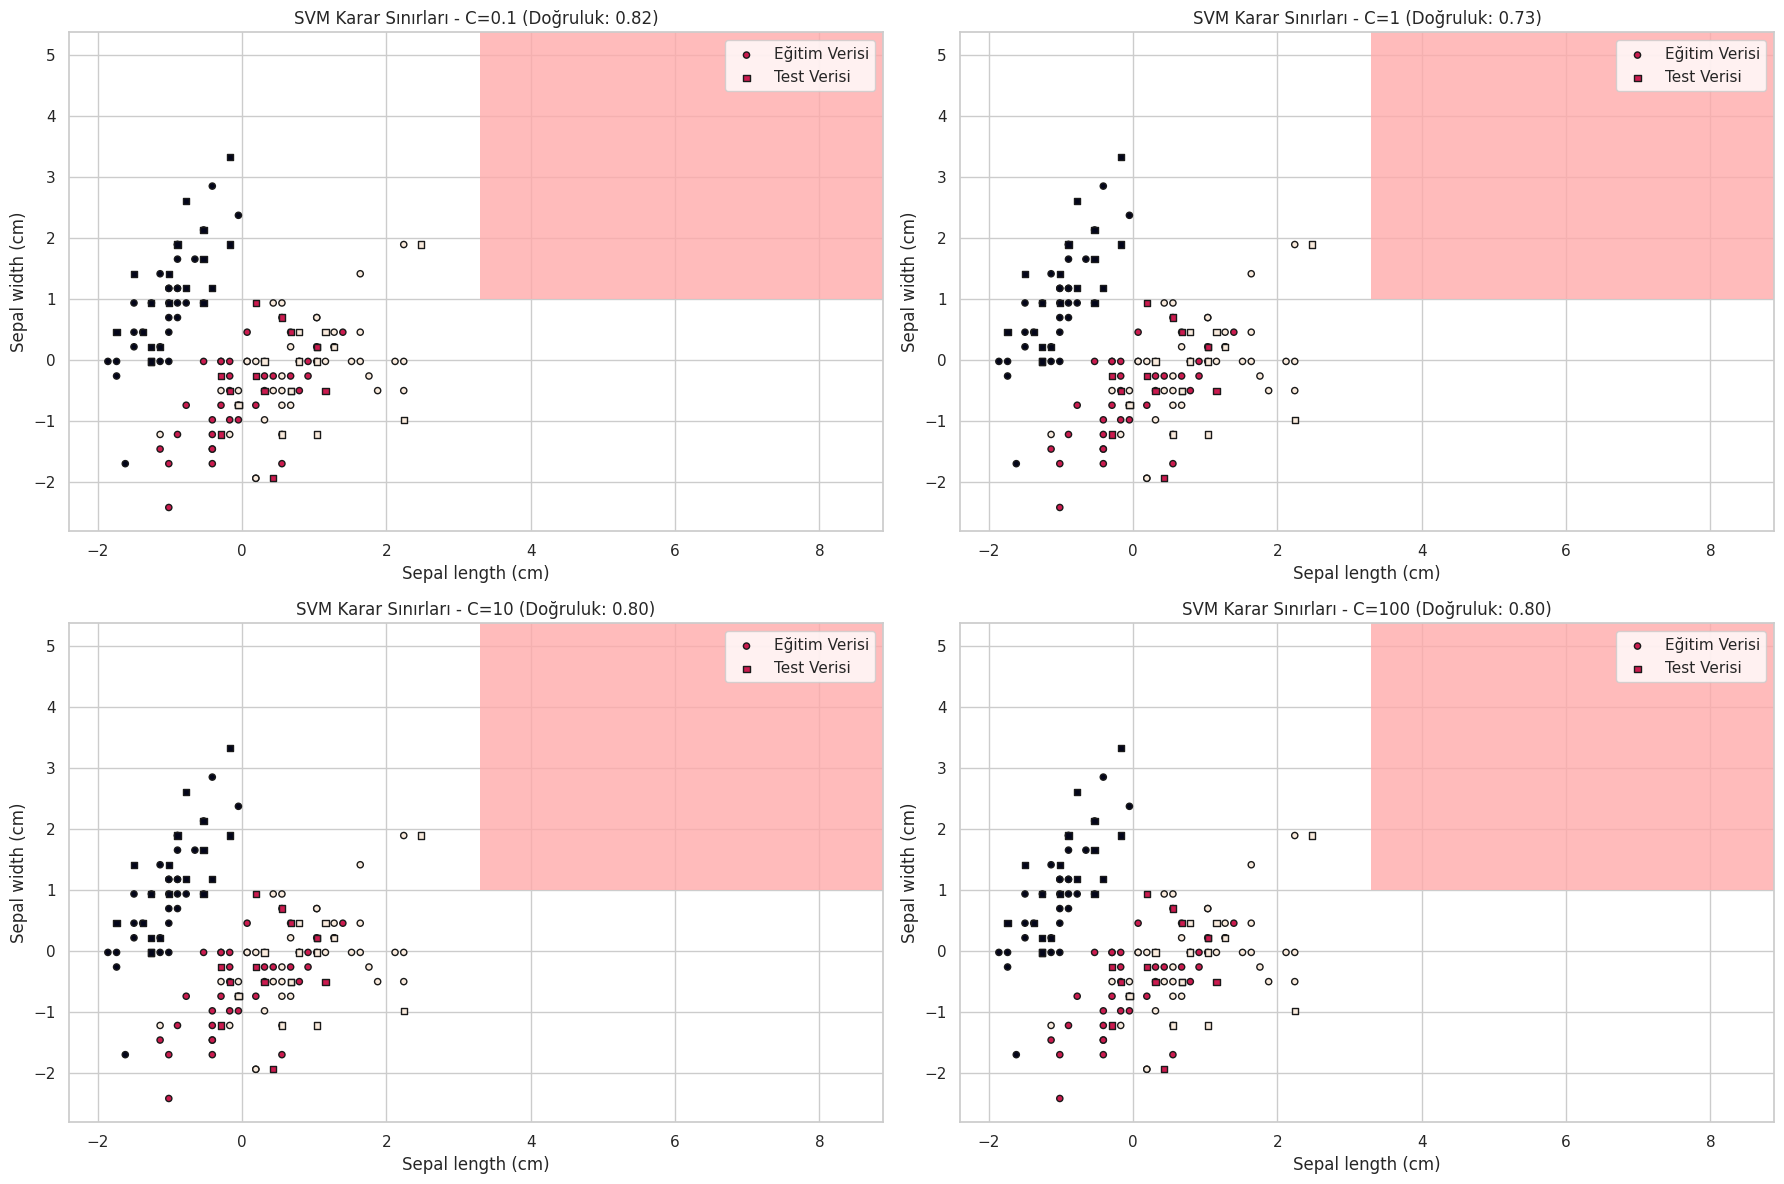

In [ ]:
# Farklı C değerleri ve renk paleti tanımları
C_values = [0.1, 1, 10, 100]
colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Karar sınırlarını görselleştirme
h = .02  # mesh gridin adımı
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure(figsize=(18, 12))

for i, C in enumerate(C_values):
    # SVM modelini oluştur ve eğit
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)

    # Tahmin yap ve doğruluğu hesapla
    accuracy = svm.score(X_test, y_test)

    # Karar sınırlarını hesapla
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Alt grafik oluşturma
    plt.subplot(2, 2, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=colors)

    # Eğitim ve test noktalarını çiz
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, marker='o', label='Eğitim Verisi')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, marker='s', label='Test Verisi')

    # Başlık ve etiketler
    plt.title(f'SVM Karar Sınırları - C={C} (Doğruluk: {accuracy:.2f})')
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.legend()

plt.tight_layout()
plt.show()


# K-NN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [ ]:
# Veri setini yükle
X, y = iris.data, iris.target

# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Veriyi ölçeklendir
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# K-NN modelini oluştur ve eğit
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Tahmin yap ve doğruluğu hesapla
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"K-NN Doğruluk: {accuracy:.2f}")

K-NN Doğruluk: 1.00


In [ ]:
# Sadece iki özelliği kullanarak veriyi yeniden yükle
X = iris.data[:, :2]
y = iris.target

# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-NN modelini oluştur ve eğit
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

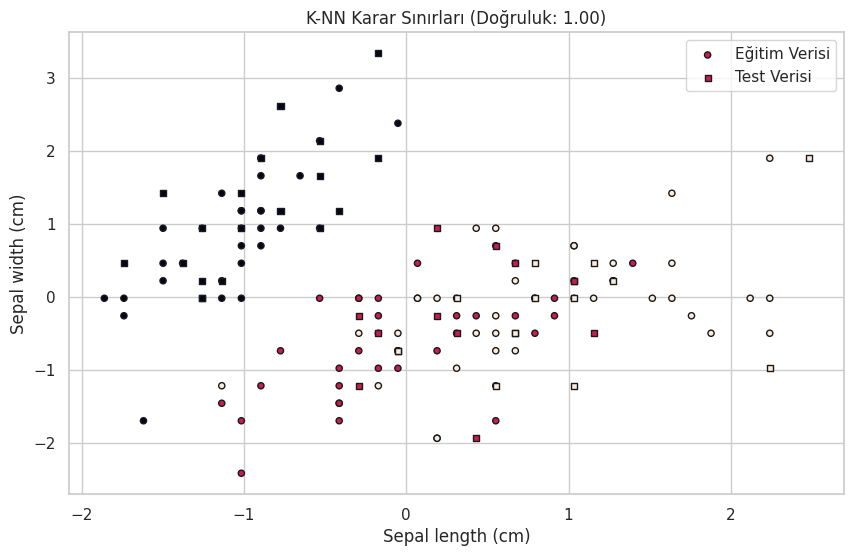

In [ ]:
# Karar sınırlarını görselleştirme
h = .02  # mesh gridin adımı
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))


# Eğitim ve test noktalarını çiz
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, marker='o', label='Eğitim Verisi')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, marker='s', label='Test Verisi')

plt.title(f"K-NN Karar Sınırları (Doğruluk: {accuracy:.2f})")
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

### Farklı K değerlerinin etkisi

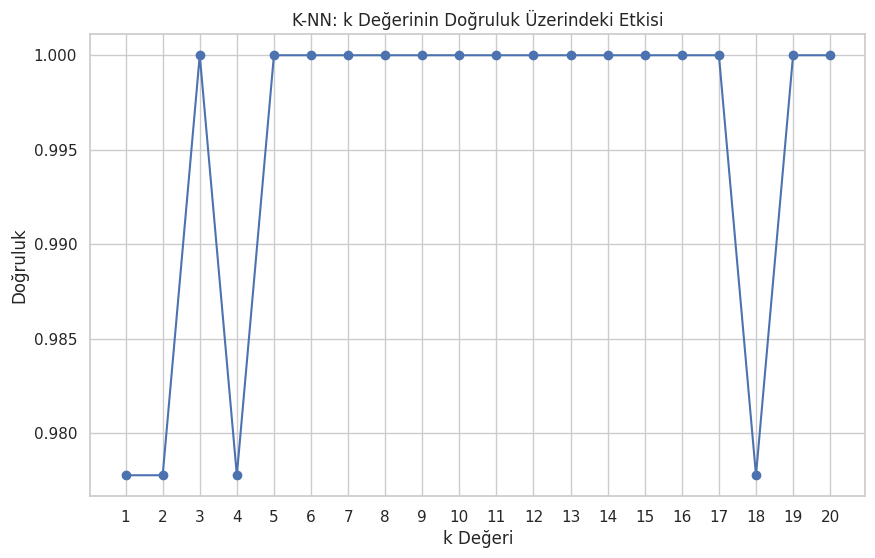

In [ ]:
# Veri setini yükle
X, y = iris.data, iris.target

# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Farklı k değerleri için doğrulukları hesaplama
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('K-NN: k Değerinin Doğruluk Üzerindeki Etkisi')
plt.xlabel('k Değeri')
plt.ylabel('Doğruluk')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes modelini oluştur ve eğit
nb = GaussianNB()
nb.fit(X_train, y_train)

# Tahmin yap ve doğruluğu hesapla
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Doğruluk: {accuracy:.2f}")


Naive Bayes Doğruluk: 0.98


### Eşik değeri etkisi

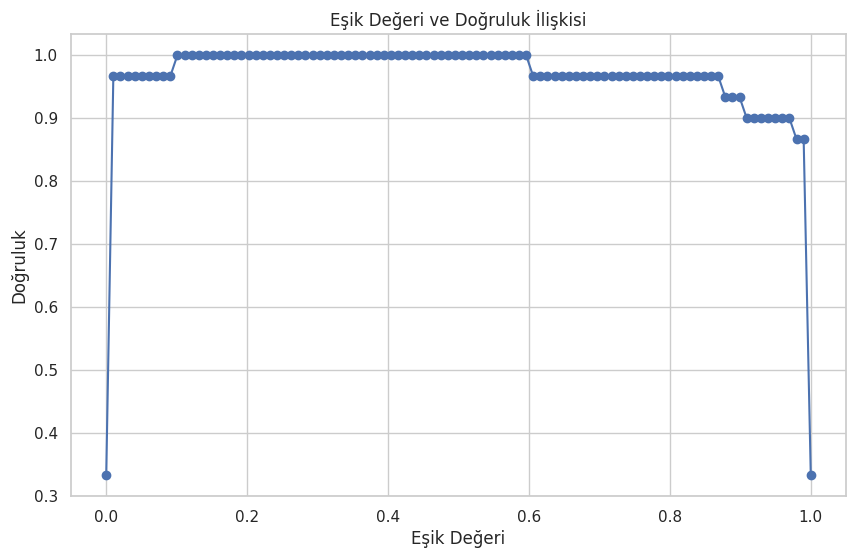

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes modelini eğitme
nb = GaussianNB()
nb.fit(X_train, y_train)

# Farklı eşik değerleri ile doğruluk hesaplama
thresholds = np.linspace(0, 1, 100)  # Eşik değerlerinin aralığı
accuracies = []

for threshold in thresholds:
    y_prob = nb.predict_proba(X_test)
    y_pred = np.argmax(y_prob > threshold, axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Eşik değerlerinin doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, marker='o', linestyle='-')
plt.xlabel('Eşik Değeri')
plt.ylabel('Doğruluk')
plt.title('Eşik Değeri ve Doğruluk İlişkisi')
plt.grid(True)
plt.show()


#Karar Ağaçları

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Karar ağacı modelini oluştur ve eğit
tree1 = DecisionTreeClassifier()
tree1.fit(X_train, y_train)

# Tahmin yap ve doğruluğu hesapla
y_pred = tree1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Karar Ağacı Doğruluk: {accuracy:.2f}")

Karar Ağacı Doğruluk: 1.00


### Ağaç Çizdirme

[Text(0.5, 0.9166666666666666, 'x[3] <= -0.594\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 0.691\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 0.63\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 0.488\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 0.421\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 0.922\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 

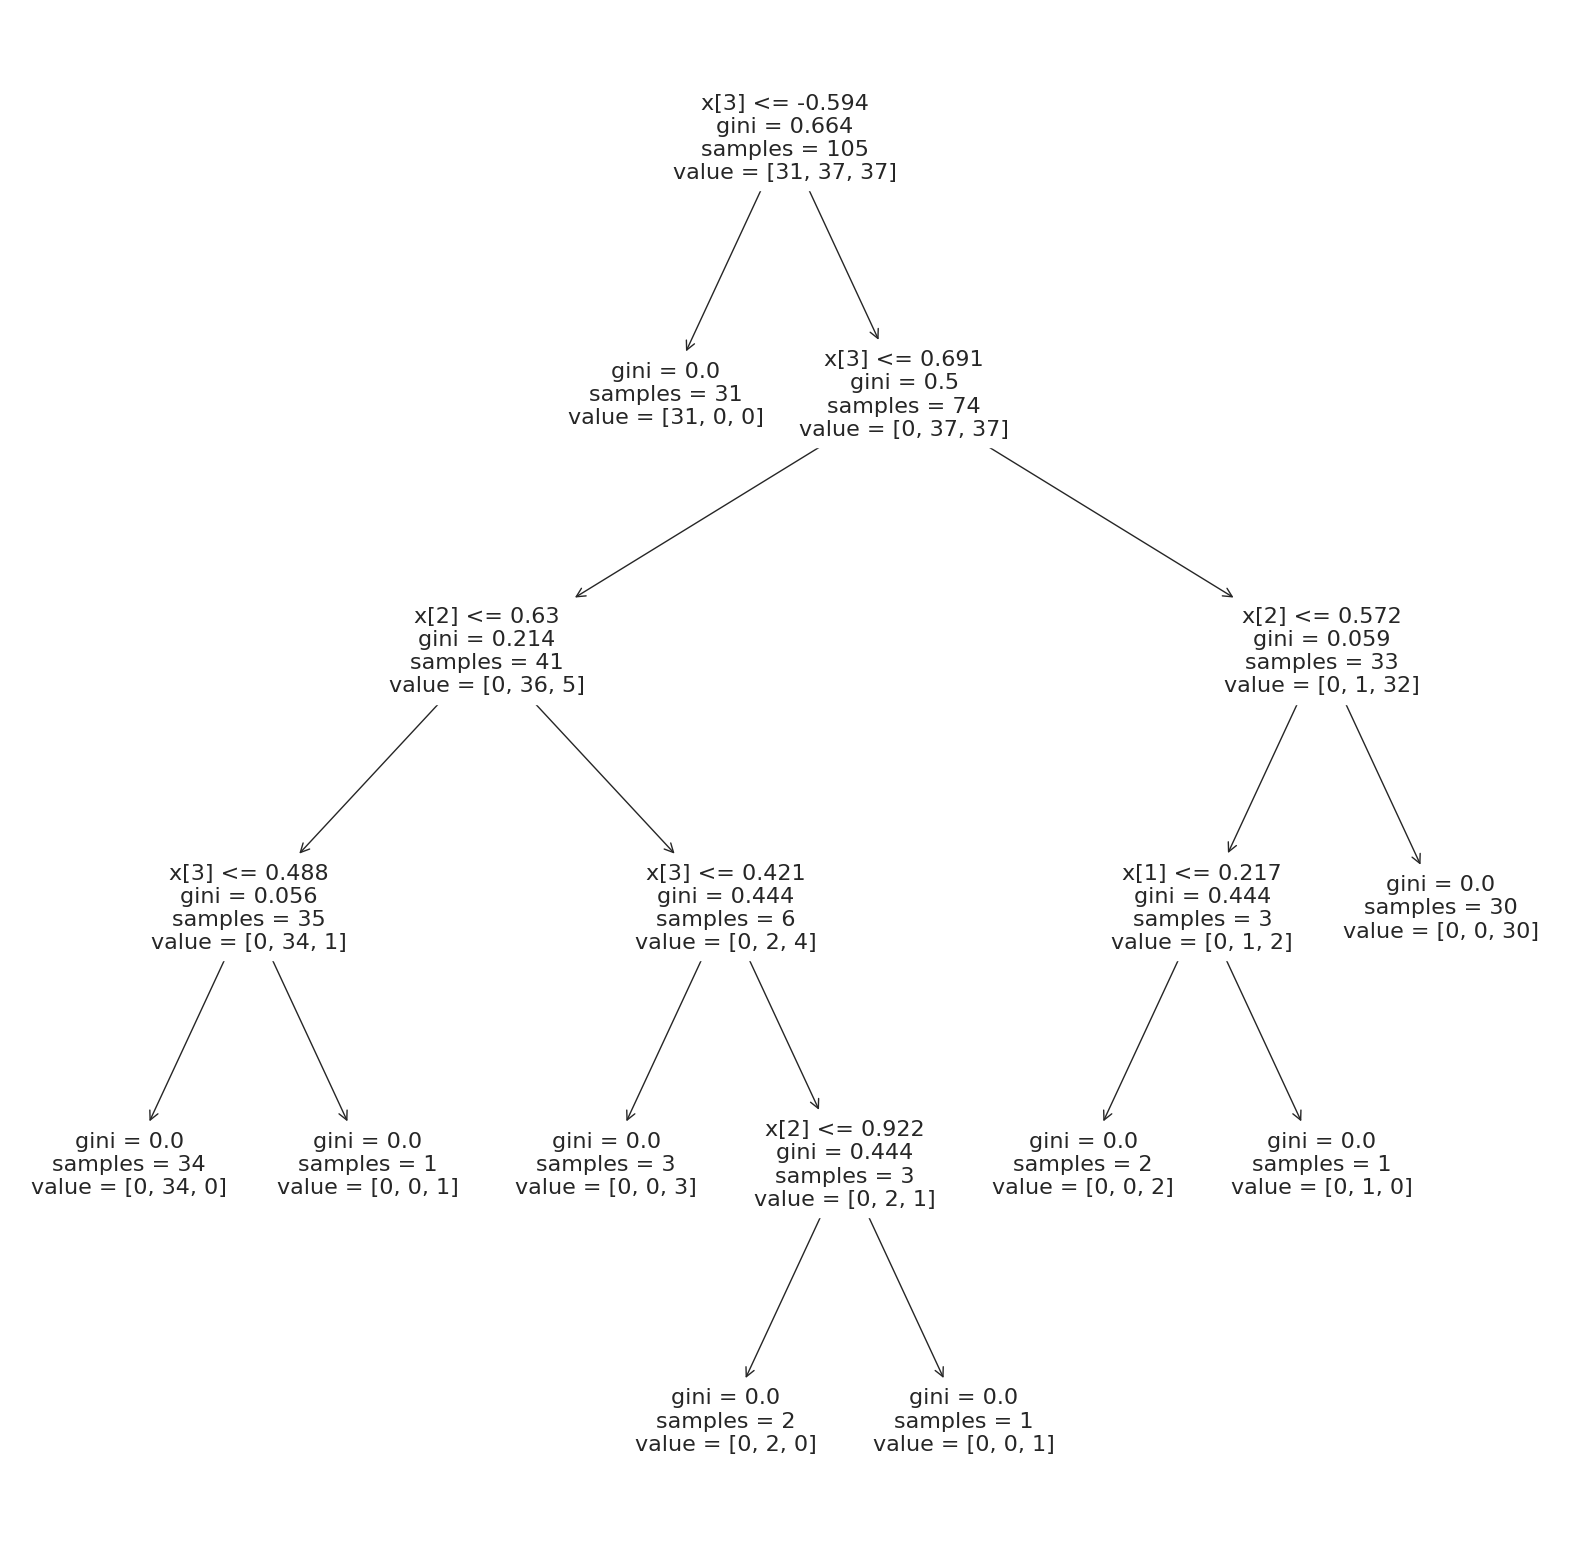

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(tree1)

###  Farklı max_depth değerlerinin karar ağaçlarına etkisi

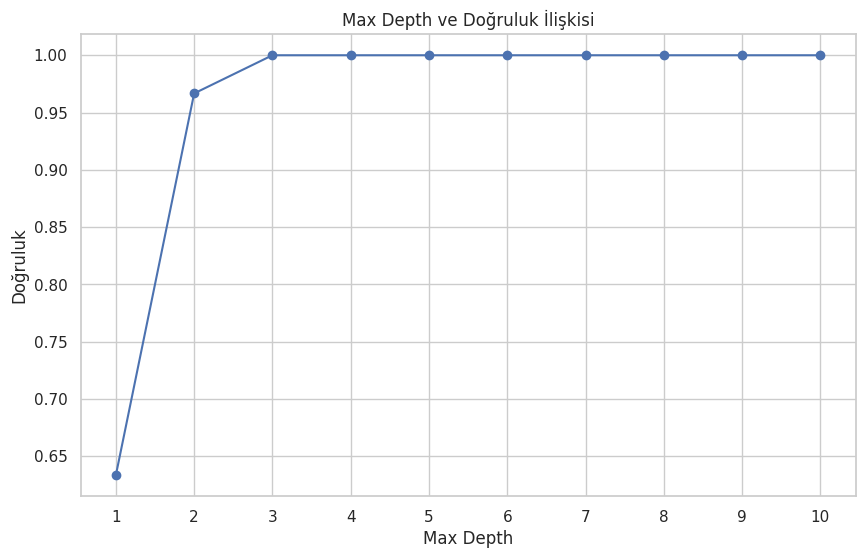

In [ ]:
import matplotlib.pyplot as plt


# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Farklı max_depth değerlerine sahip karar ağaçlarını eğitme
max_depths = range(1, 11)  # Max Depth aralığı
accuracies = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Max Depth değerlerinin doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracies, marker='o', linestyle='-')
plt.xlabel('Max Depth')
plt.ylabel('Doğruluk')
plt.title('Max Depth ve Doğruluk İlişkisi')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### Farklı Min-Sample Etkisi

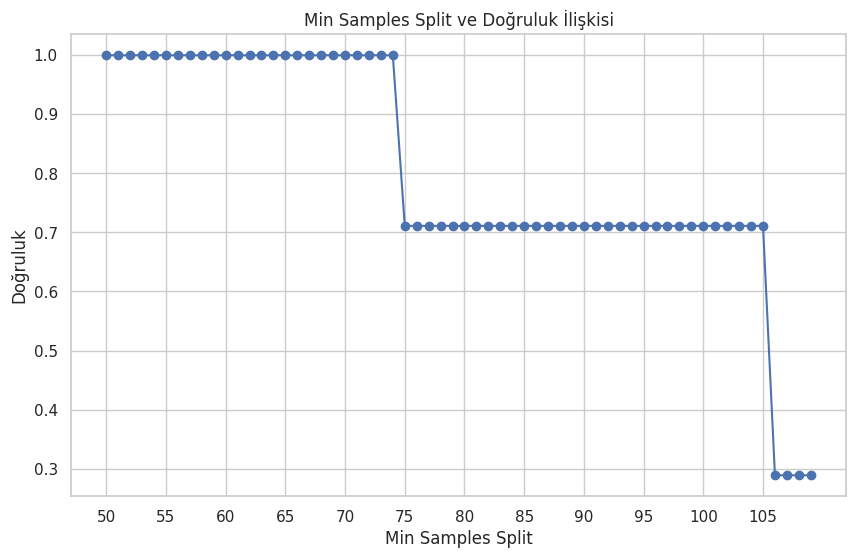

In [ ]:

# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Farklı min_samples_split değerlerine sahip karar ağaçlarını eğitme
min_samples_splits = range(50, 110)  # Min Samples Split aralığı
accuracies = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=20)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Min Samples Split değerlerinin doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, accuracies, marker='o', linestyle='-')
plt.xlabel('Min Samples Split')
plt.ylabel('Doğruluk')
plt.title('Min Samples Split ve Doğruluk İlişkisi')
plt.xticks(range(50, 110,5))
plt.grid(True)
plt.show()

### Farklı criterion (kriter) değerlerinin etkisi

<ipython-input-122-f410218a258d>:25: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0.0,1, 0.01)


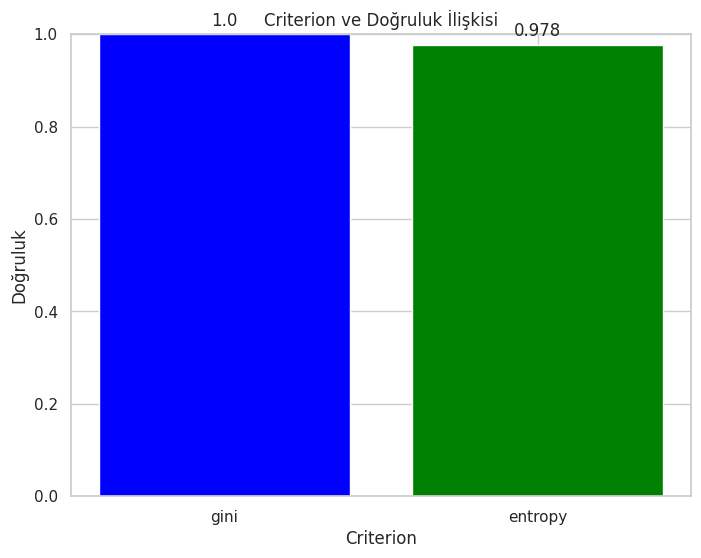

In [ ]:

# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Farklı criterion (kriter) değerlerine sahip karar ağaçlarını eğitme
criteria = ['gini', 'entropy']
accuracies = []

for criterion in criteria:
    dt = DecisionTreeClassifier(criterion=criterion, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Criterion (kriter) değerlerinin doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(8, 6))
plt.bar(criteria, accuracies, color=['blue', 'green'])
plt.xlabel('Criterion')
plt.ylabel('Doğruluk')
plt.title('Criterion ve Doğruluk İlişkisi')
plt.ylim(0.0,1, 0.01)
bars = plt.bar(criteria, accuracies, color=['blue', 'green'])
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(accuracy, 3), ha='center', va='bottom')
plt.show()

[Text(0.3333333333333333, 0.9375, 'x[2] <= 2.45\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2222222222222222, 0.8125, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.4444444444444444, 0.8125, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.2222222222222222, 0.6875, 'x[3] <= 1.6\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.1111111111111111, 0.5625, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3333333333333333, 0.5625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6875, 'x[2] <= 5.15\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.5555555555555556, 0.5625, 'x[3] <= 1.75\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(0.3333333333333333, 0.4375, 'x[1] <= 2.35\nentropy = 0.918\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.2222222222222222, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3125, 'x[2] <= 5.05\ne

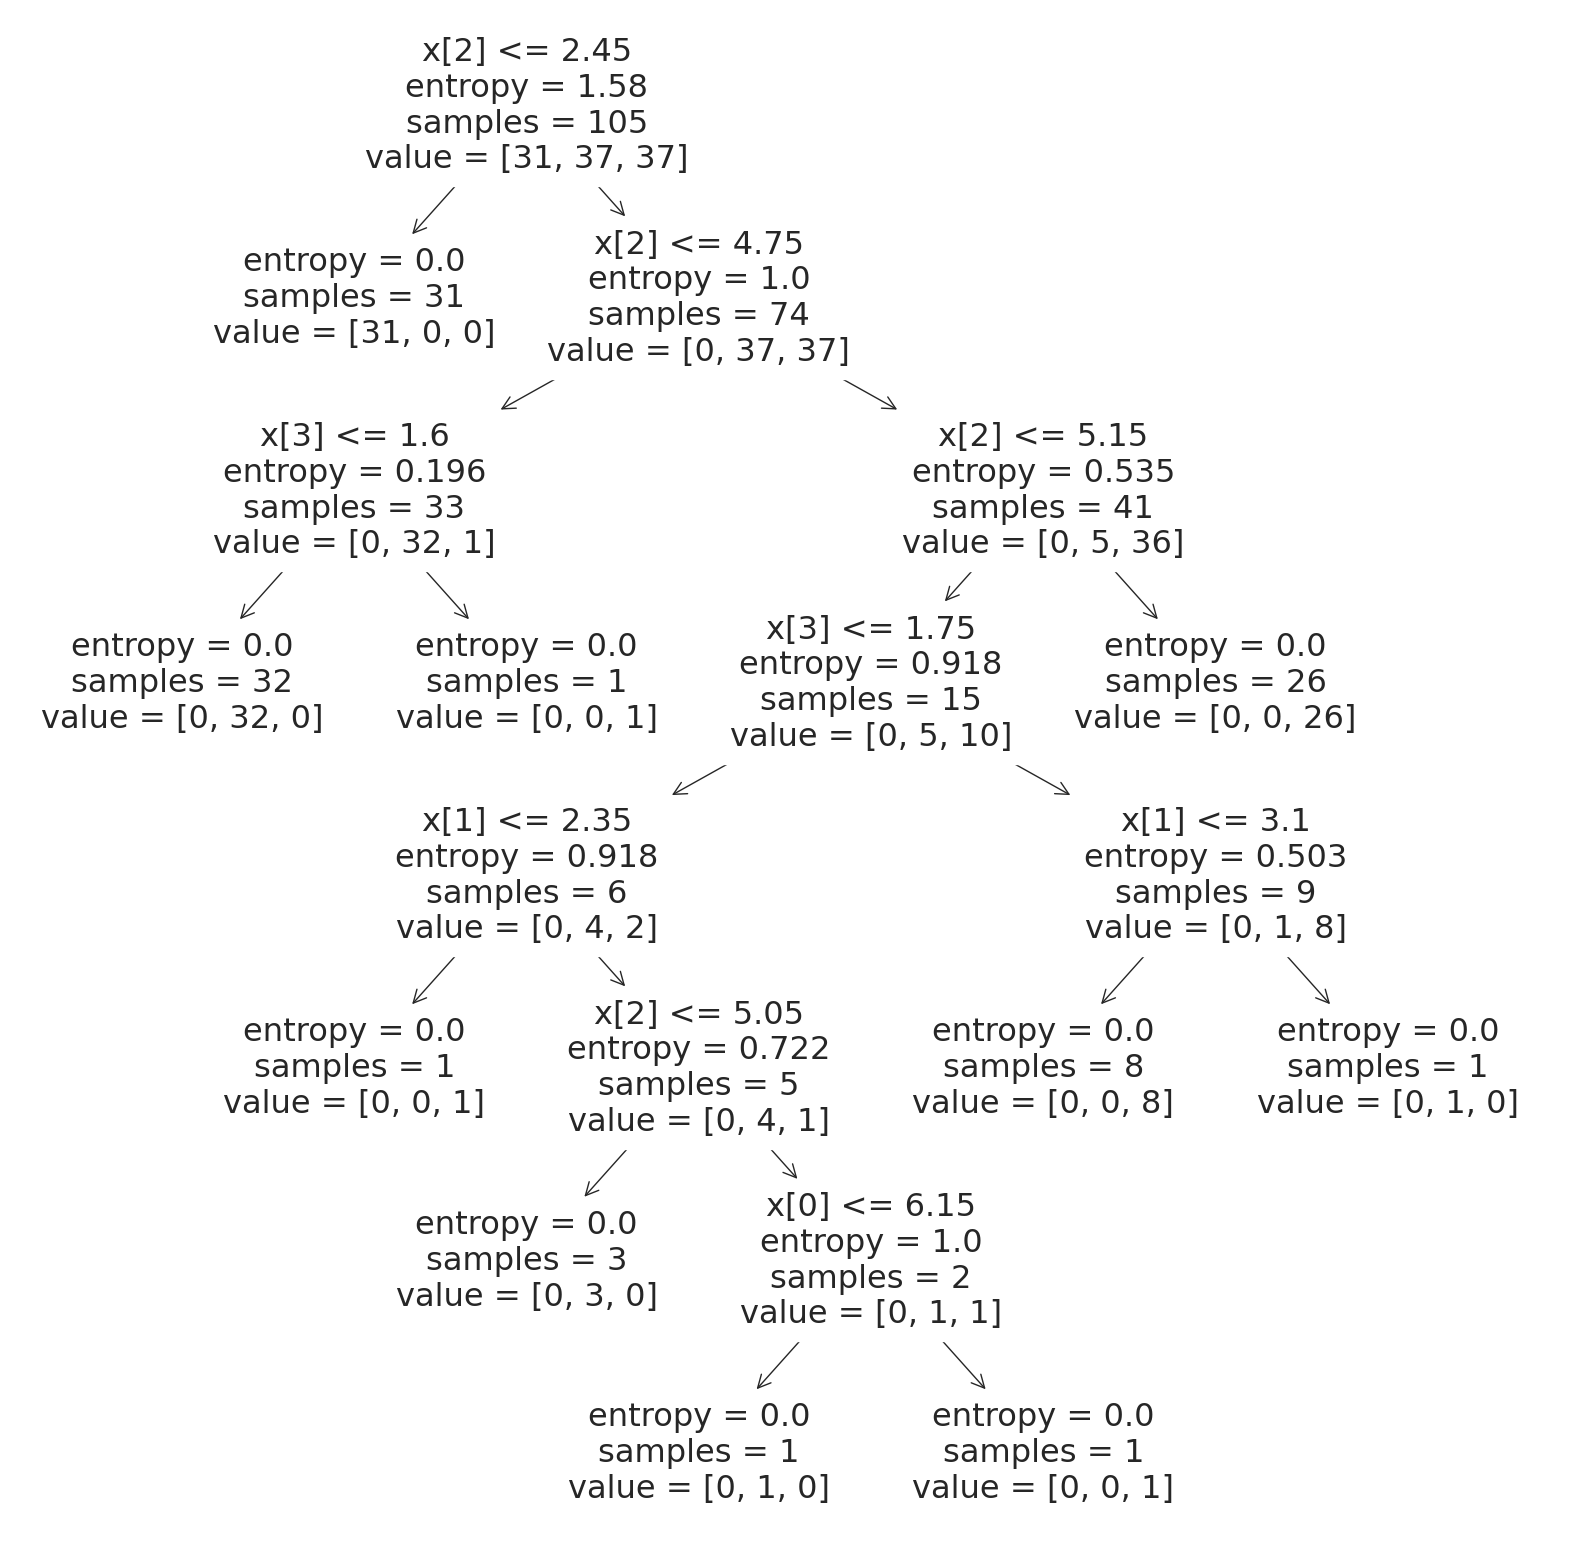

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt)

# Rastgele Orman

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Rastgele Orman modelini oluştur ve eğit
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

# Tahmin yap ve doğruluğu hesapla
y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Rastgele Orman Doğruluk: {accuracy:.2f}")

Rastgele Orman Doğruluk: 1.00


### Farklı ağaç sayılarının Etkisi

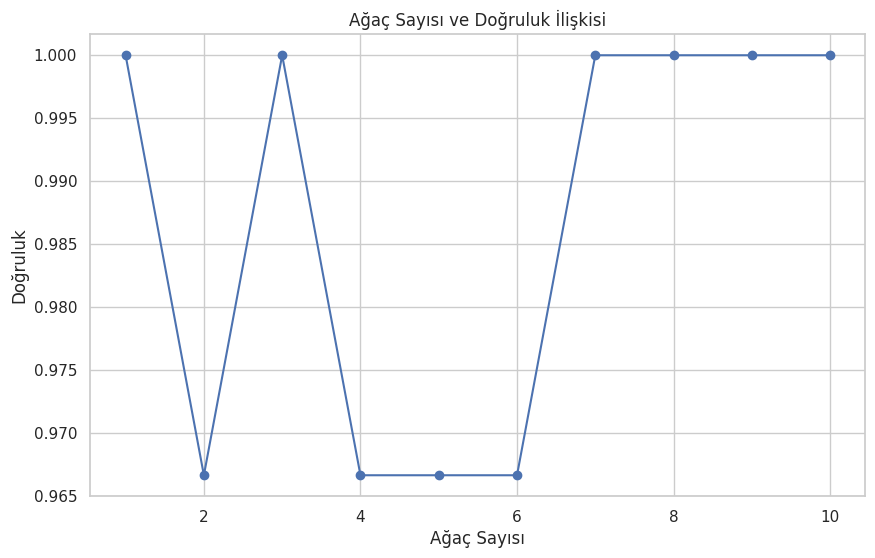

In [ ]:

# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Farklı ağaç sayılarına sahip rastgele ormanları eğitme
n_estimators = range(1, 11)  # Ağaç sayısı aralığı
accuracies = []

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Ağaç sayısının doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, accuracies, marker='o', linestyle='-')
plt.xlabel('Ağaç Sayısı')
plt.ylabel('Doğruluk')
plt.title('Ağaç Sayısı ve Doğruluk İlişkisi')
plt.grid(True)
plt.show()

### Ağaç yapısını görselleştirme

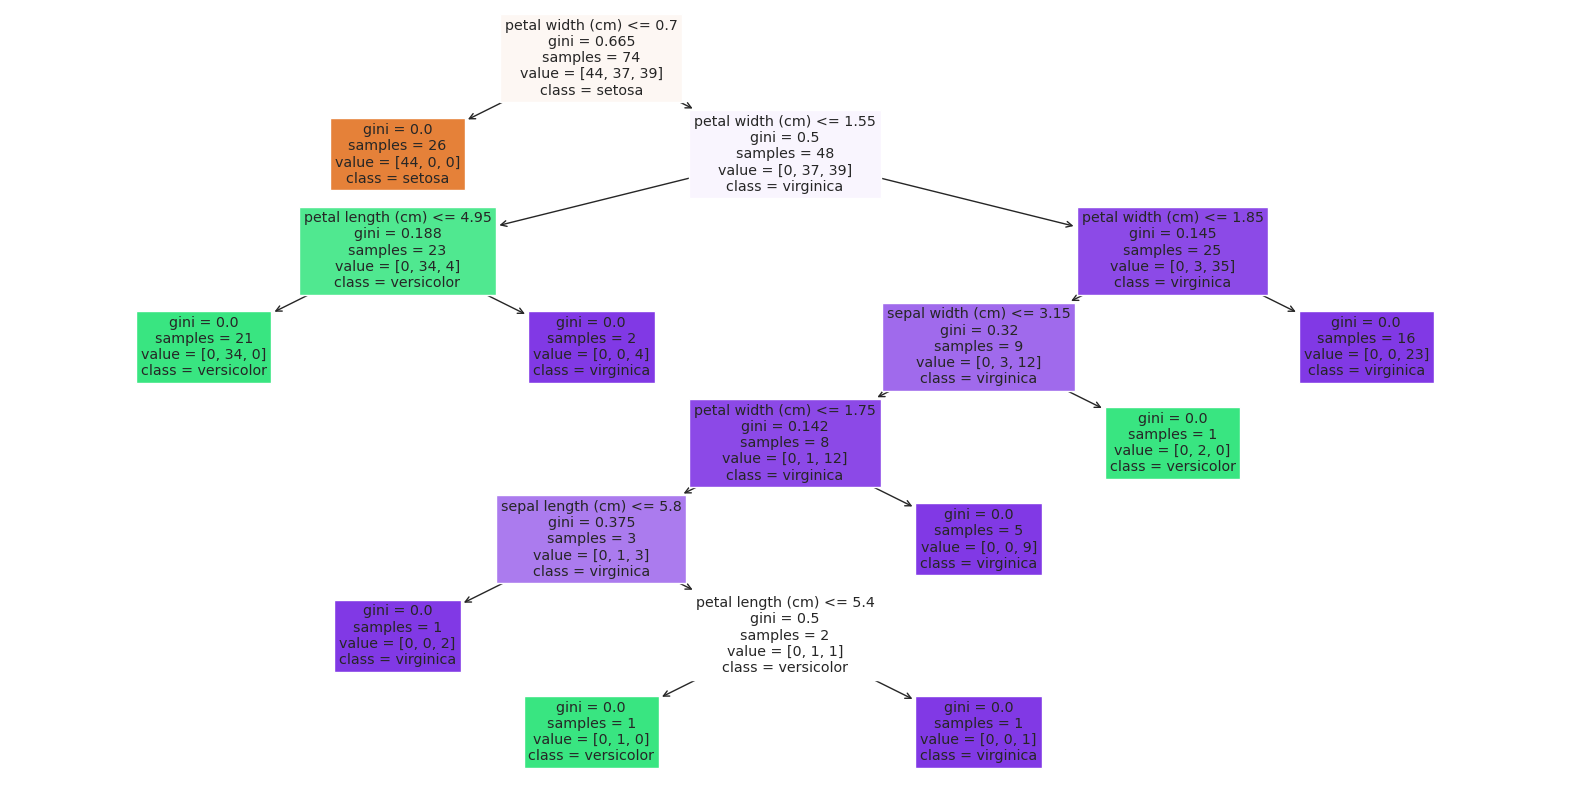

In [ ]:
from sklearn.tree import plot_tree

# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rastgele orman sınıflandırıcısını eğitme
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Ağaç yapısını görselleştirme
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

# Yapay Sinir Ağları

In [ ]:
from sklearn.neural_network import MLPClassifier

# Yapay Sinir Ağları modelini oluştur ve eğit
mlp = MLPClassifier(max_iter=300)
mlp.fit(X_train, y_train)

# Tahmin yap ve doğruluğu hesapla
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Yapay Sinir Ağları Doğruluk: {accuracy:.2f}")

Yapay Sinir Ağları Doğruluk: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Farklı katman sayısı etkisi

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


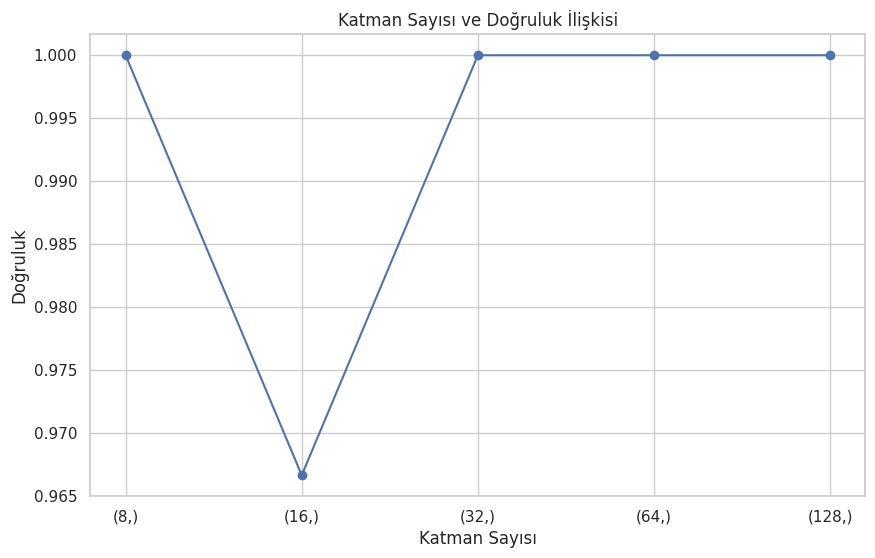

In [ ]:
# Farklı katman sayısı etkisi

from sklearn.neural_network import MLPClassifier


# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi normalize etme
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Farklı katman sayılarına sahip sinir ağlarını eğitme
hidden_layer_sizes = [(8,), (16,), (32,), (64,), (128,)]  # Katman boyutları aralığı
accuracies = []

for hidden_layer_size in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Katman sayısının doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(hidden_layer_sizes) + 1), accuracies, marker='o', linestyle='-')
plt.xlabel('Katman Sayısı')
plt.ylabel('Doğruluk')
plt.title('Katman Sayısı ve Doğruluk İlişkisi')
plt.xticks(range(1, len(hidden_layer_sizes) + 1), [str(layer) for layer in hidden_layer_sizes])
plt.grid(True)
plt.show()

### Farklı öğrenme oranı etkisi

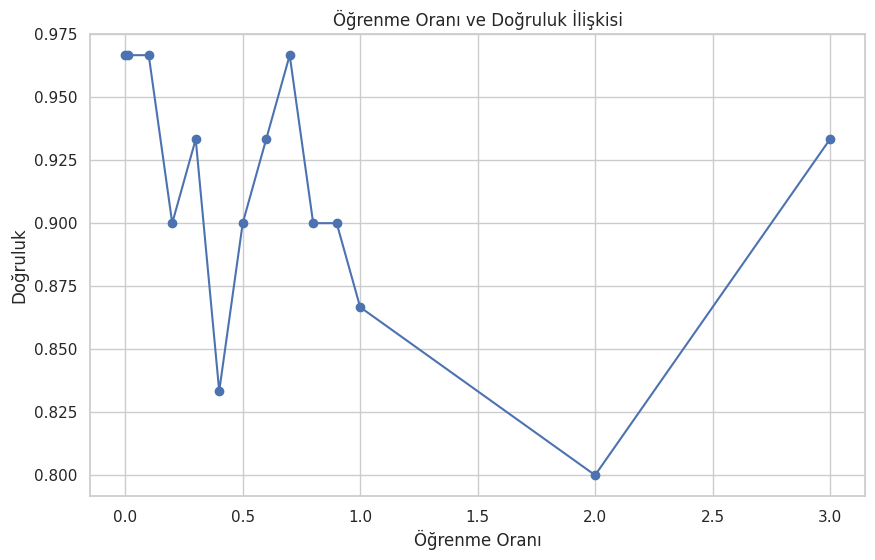

In [ ]:
# Farklı öğrenme oranı etkisi


# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi normalize etme
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Farklı öğrenme oranlarına sahip sinir ağlarını eğitme
learning_rates = [0.001,0.01, 0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3]  # Öğrenme oranı aralığı
accuracies = []

for learning_rate in learning_rates:
    mlp = MLPClassifier(learning_rate_init=learning_rate, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Öğrenme oranının doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-')
plt.xlabel('Öğrenme Oranı')
plt.ylabel('Doğruluk')
plt.title('Öğrenme Oranı ve Doğruluk İlişkisi')
plt.grid(True)
plt.show()

### Farklı Epochs sayısı etkisi

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

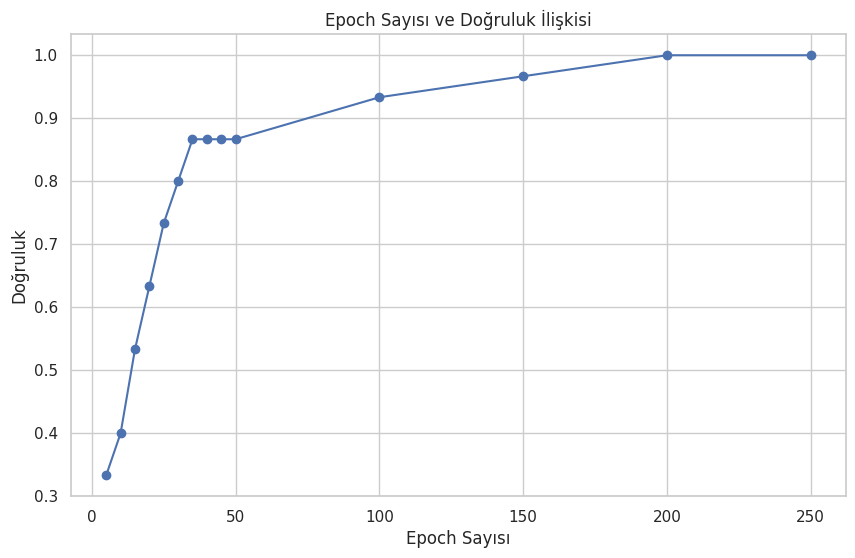

In [ ]:
# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi normalize etme
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Farklı epoch sayılarına sahip sinir ağlarını eğitme
epochs_values = [5,10,15,20,25,30,35,40,45, 50, 100,150,200,250 ]  # Epoch sayısı aralığı
accuracies = []

for epochs in epochs_values:
    mlp = MLPClassifier(max_iter=epochs, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Epoch sayısının doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(epochs_values, accuracies, marker='o', linestyle='-')
plt.xlabel('Epoch Sayısı')
plt.ylabel('Doğruluk')
plt.title('Epoch Sayısı ve Doğruluk İlişkisi')
plt.grid(True)
plt.show()

### Farklı aktivasyon fonksiyonları etkisi

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


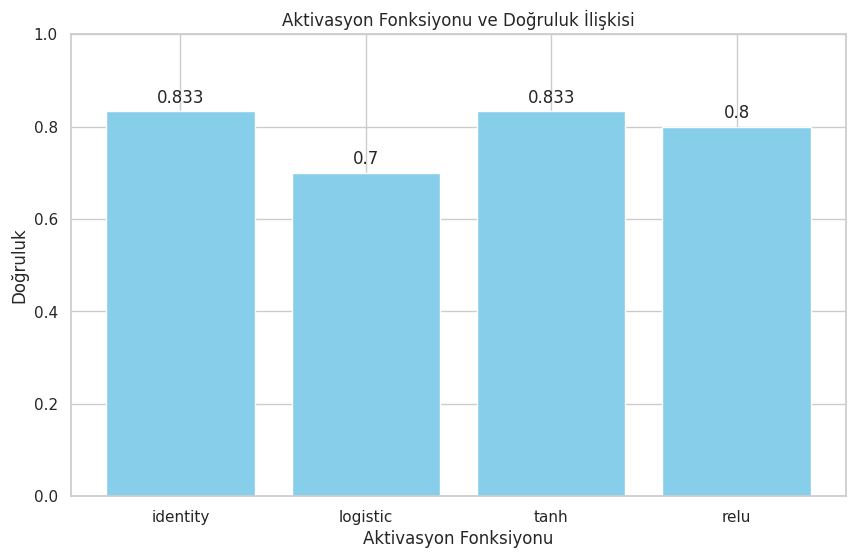

In [ ]:
# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi normalize etme
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Farklı aktivasyon fonksiyonlarına sahip sinir ağlarını eğitme
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
accuracies = []

for activation_function in activation_functions:
    mlp = MLPClassifier(activation=activation_function, max_iter=50, random_state=20)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Aktivasyon fonksiyonlarının doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(10, 6))

bars = plt.bar(activation_functions, accuracies, color='skyblue')

plt.xlabel('Aktivasyon Fonksiyonu')
plt.ylabel('Doğruluk')
plt.title('Aktivasyon Fonksiyonu ve Doğruluk İlişkisi')
plt.ylim(0.0, 1.0)

for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(accuracy, 3), ha='center', va='bottom')
plt.show()

### Farklı Düzenleme Parametreleri (Regularization Parameters) etkisi

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

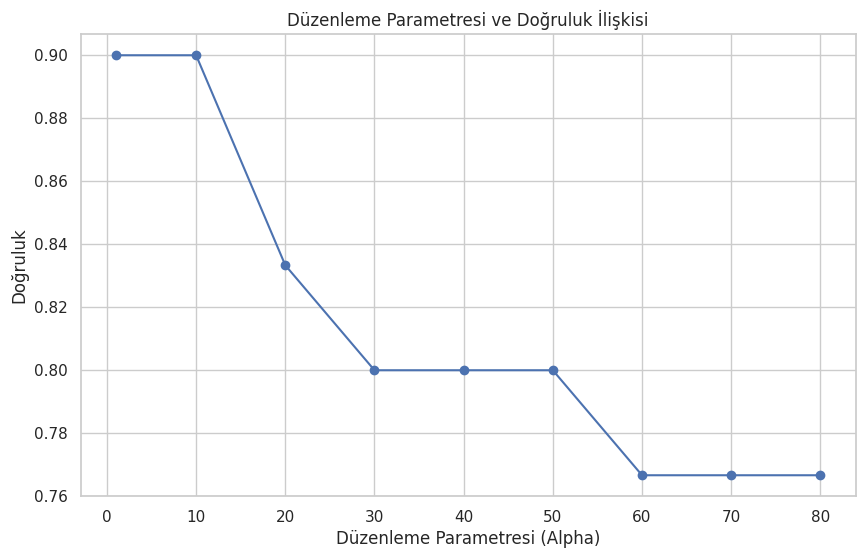

In [ ]:
# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi normalize etme
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Farklı düzenleme parametrelerine sahip sinir ağlarını eğitme
regularization_parameters = [1,10,20,30,40,50,60,70,80]
accuracies = []

for alpha in regularization_parameters:
    mlp = MLPClassifier(alpha=alpha, max_iter=100, random_state=21)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Düzenleme parametrelerinin doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(regularization_parameters, accuracies, marker='o', linestyle='-')
plt.xlabel('Düzenleme Parametresi (Alpha)')
plt.ylabel('Doğruluk')
plt.title('Düzenleme Parametresi ve Doğruluk İlişkisi')
plt.grid(True)
plt.show()

# Lojistik Regresyon

In [ ]:
from sklearn.linear_model import LogisticRegression

# Lojistik Regresyon modelini oluştur ve eğit
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Tahmin yap ve doğruluğu hesapla
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Lojistik Regresyon Doğruluk: {accuracy:.2f}")

Lojistik Regresyon Doğruluk: 1.00


### farklı penalization etkisi

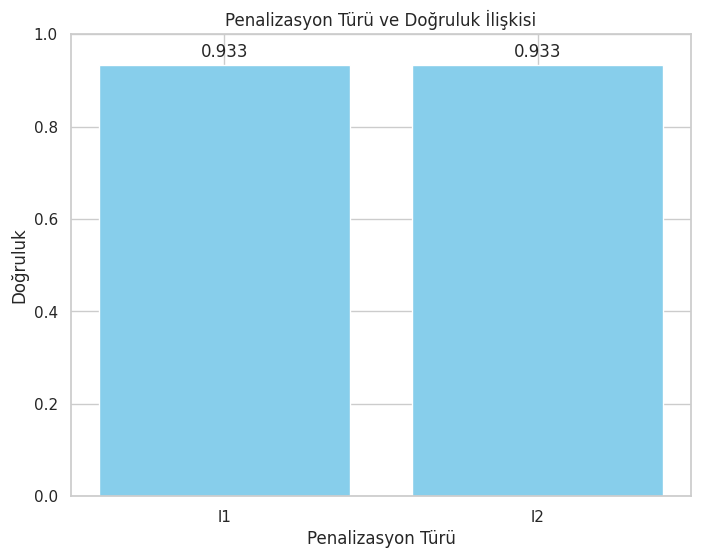

In [ ]:
# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi normalize etme
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Farklı penalizasyon türlerine sahip lojistik regresyon modellerini eğitme
penalties = ['l1', 'l2']
accuracies = []

for penalty in penalties:
    lr = LogisticRegression(penalty=penalty, max_iter=1000, random_state=21, solver='saga')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Penalizasyon türlerinin doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(8, 6))
bars=plt.bar(penalties, accuracies, color='skyblue')
plt.xlabel('Penalizasyon Türü')
plt.ylabel('Doğruluk')
plt.title('Penalizasyon Türü ve Doğruluk İlişkisi')
plt.ylim(0.0, 1)

for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(accuracy, 3), ha='center', va='bottom')


plt.show()


### Farklı Düzenleme Katsayısı Etkisi

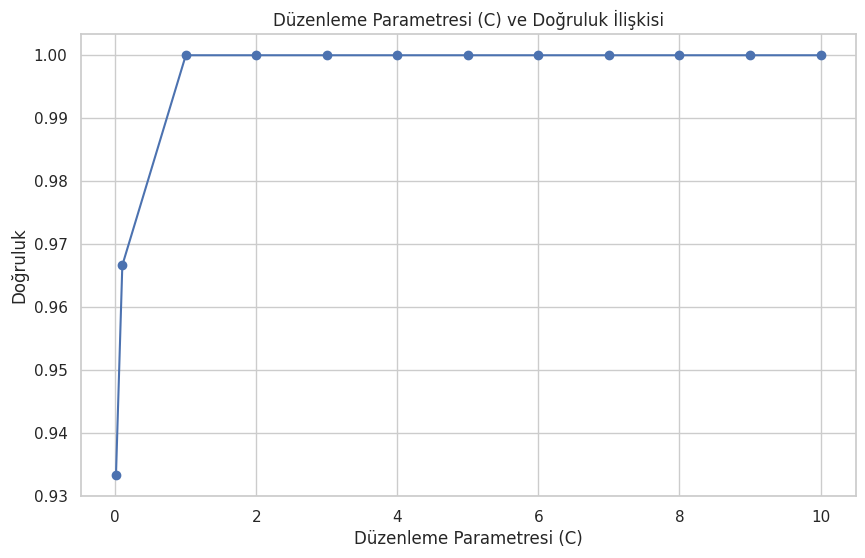

In [ ]:
# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi normalize etme
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Farklı C değerlerine sahip lojistik regresyon modellerini eğitme
C_values = [0.01, 0.1, 1,2,3,4,5,6,7,8,9,10]  # C değeri aralığı
accuracies = []

for C in C_values:
    lr = LogisticRegression(C=C, max_iter=1000, random_state=42, solver='saga')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# C değerinin doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o', linestyle='-')
plt.xlabel('Düzenleme Parametresi (C)')
plt.ylabel('Doğruluk')
plt.title('Düzenleme Parametresi (C) ve Doğruluk İlişkisi')
plt.grid(True)
plt.show()

### Farklı İterasyon Sayısı Etkisi

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

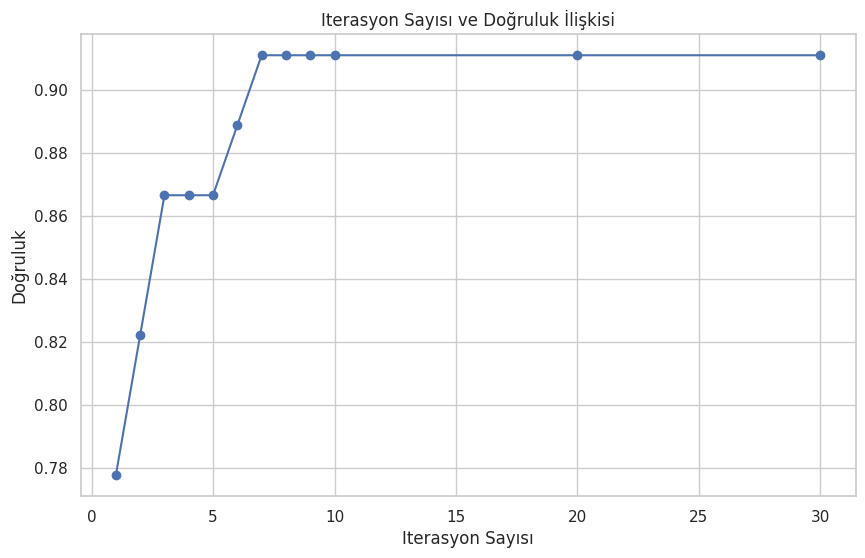

In [ ]:
# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi normalize etme
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# Farklı iterasyon sayılarına sahip lojistik regresyon modellerini eğitme
iteration_values = [1,2,3,4,5,6,7,8,9,10, 20, 30]  # Iterasyon sayısı aralığı
accuracies = []

for max_iter in iteration_values:
    lr = LogisticRegression(max_iter=max_iter, random_state=20, solver='saga')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Iterasyon sayısının doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(iteration_values, accuracies, marker='o', linestyle='-')
plt.xlabel('Iterasyon Sayısı')
plt.ylabel('Doğruluk')
plt.title('Iterasyon Sayısı ve Doğruluk İlişkisi')
plt.grid(True)
plt.show()

### Farklı eşik değeri etkisi

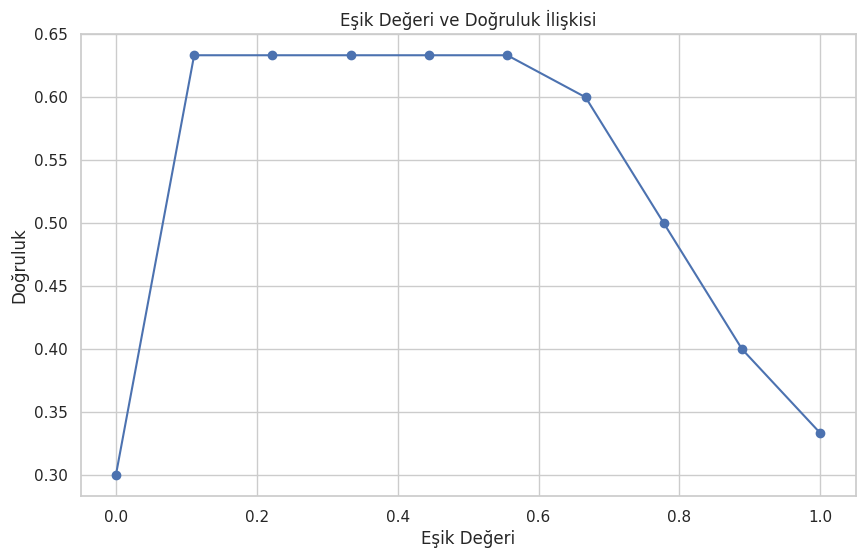

In [ ]:
# Iris veri setini yükleme
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi normalize etme
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Farklı eşik değerlerine sahip lojistik regresyon modellerini eğitme
threshold_values = np.linspace(0, 1, 10)  # Eşik değeri aralığı
accuracies = []

for threshold in threshold_values:
    lr = LogisticRegression(random_state=42, solver='saga')
    lr.fit(X_train, y_train)
    y_pred = (lr.predict_proba(X_test)[:, 1] > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Eşik değerinin doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracies, marker='o', linestyle='-')
plt.xlabel('Eşik Değeri')
plt.ylabel('Doğruluk')
plt.title('Eşik Değeri ve Doğruluk İlişkisi')
plt.grid(True)
plt.show()


# Farklı Sınıflandırma Yöntemlerinin Karşılaştırılması

## Iris Veri Seti ile Karşılaştırma

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Seaborn stilini kullanmak için
sns.set(style="whitegrid")

In [ ]:
# Iris veri setini yükle
iris = load_iris()
X, y = iris.data, iris.target

# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Modellerin tanımlanması
models = {
    'K-NN': KNeighborsClassifier(n_neighbors=3),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=300)
}

# Modellerin eğitilmesi ve doğruluklarının hesaplanması
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

# Doğruluk sonuçlarını yazdır
for name, accuracy in accuracy_results.items():
    print(f"{name} Doğruluk: {accuracy:.2f}")

K-NN Doğruluk: 1.00
SVM Doğruluk: 0.97
Decision Tree Doğruluk: 1.00
Random Forest Doğruluk: 1.00
Logistic Regression Doğruluk: 1.00
Naive Bayes Doğruluk: 1.00
Neural Network Doğruluk: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


<ipython-input-86-7ac95c7355e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='viridis')


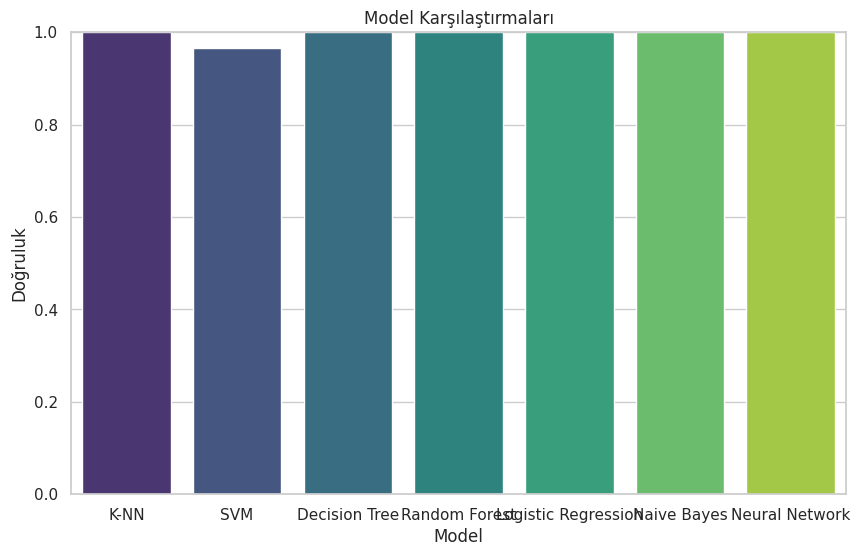

In [ ]:
# Doğruluk sonuçlarını bar grafikte görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='viridis')
plt.title('Model Karşılaştırmaları')
plt.xlabel('Model')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)
plt.show()